# **TUBERCULOSIS PREDICTION LITERATURE**

---


I decided to observe the development of the incidence of tuberculosis per 100 thousand inhabitants per year, this characteristic belongs to one of the columns of the dataset "final_socioeco_demographics"

1. DATA ANALYSIS
- A development of the outbreak is observed from the year 2000
- The years 2000, 2006 and 20007 are observed with the highest peaks of the outbreak

2. CORRELATION
- I looked for any correlation between the data through a heat map
- 12 columns were found that maintained a correlation greater than or equal to 70%.
- 10 relevant columns were selected, they have something in common; they belong to census data, government budgets, etc., data that can be obtained in advance and for prevention.
-Name of the selected columns:
 - Current health expenditure (% of GDP),
 - Domestic general government health expenditure (% of GDP),
 - Domestic general government health expenditure (% of current health expenditure),
 - Domestic private health expenditure (% of current health expenditure),
 - Immunization, DPT (% of children ages 12-23 months),
 - Immunization, meals (% of children ages 12-23 months),
 - Labor force, female,
 - Labor force, total,
 - People using at least basic drinking water services (% of population),
 - People using at least basic sanitation services (% of population),

3. REGRESSION MODEL
 - The regression model is used to predict the approximate amount of the outbreak based on the information provided.
 - Results:
    - R2 = 96 %
    - MAE = 4.223687596787903
    - MSE = 116.36824824010876
    - RMSE = 10.787411563489583

4. MODEL CLASSIFICATION
- The classification model is characterized by being a 2-class model, where 0 = "No outbreak" and 1 = outbreak.
- **It is assumed that 10 cases per 100,000 inhabitants is considered an outbreak, but this number will vary based on the investigations**. Under this concept I classify with 1=Outbreak and 0=normal
- It is intended to predict the possibilities of a possible outbreak or not
- Results:
  - It does not present overfitting
  - accuracy = 96%
  - recall 0 = 100%
  - reacll 1 = 86%

*If this analysis seems good to you, the same could be done for malaria*

### **BOOKSTORES - DATA LOAD**



In [1]:
#!pip install optuna

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay,
    auc,
    classification_report,
    confusion_matrix,
    log_loss,
    make_scorer,
    accuracy_score, precision_score, recall_score, f1_score,
)

In [3]:
ruta = "/content/drive/MyDrive/Sudan/data_set/final_socioeco_demographics.csv"
df = pd.read_csv(ruta)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 34 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   Unnamed: 0                                                                                              74 non-null     int64  
 1   Access to anti-retroviral drugs, female (%)                                                             74 non-null     int64  
 2   Access to anti-retroviral drugs, male (%)                                                               74 non-null     int64  
 3   Agriculture, forestry, and fishing, value added (% of GDP)                                              74 non-null     int64  
 4   Current health expenditure (% of GDP)                                                         

# **1. DATA ANALYSIS**

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
#Add column predicting outbreak
# 1 = outbreak, 0 = normal
df['outbreak'] = np.where(df['Incidence of tuberculosis (per 100,000 people)'] > 10, '1', '0')

In [6]:
print('Incidence of tuberculosis:')
print(df['Incidence of tuberculosis (per 100,000 people)'].unique())
print('\nYears:')
print(df['Year'].unique())
print(df['Year'].nunique(), 'different number of years')


Incidence of tuberculosis:
[  0 148 139 138 142 143 146 144 116 121 119 105 103 100  94  88  82  77
  71  67  62  58  54  50]

Years:
[1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009.
 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021.
 2022. 2023.]
74 different number of years


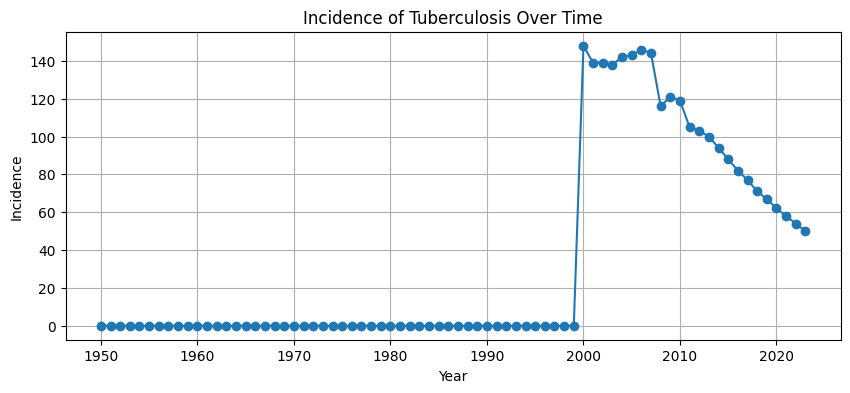

In [7]:
#Evolution of tuberculosis incidence by year
tbc = df.groupby('Year')['Incidence of tuberculosis (per 100,000 people)'].sum().reset_index()
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(tbc['Year'], tbc['Incidence of tuberculosis (per 100,000 people)'], marker='o', linestyle='-')
plt.title('Incidence of Tuberculosis Over Time')
plt.xlabel('Year')
plt.ylabel('Incidence')
plt.grid(True)
plt.show()

  - The data varies from the year 2000 onwards.
  - I will make a graph excluding the year 2000 onwards.

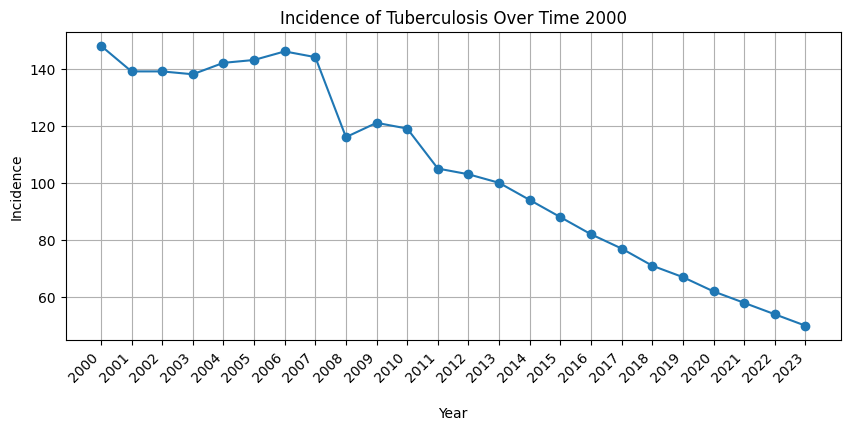

In [8]:
#Evolution of tuberculosis incidence since 2000
year_2000 = df[df['Year']>=2000]
tbc_2000 = year_2000.groupby('Year')['Incidence of tuberculosis (per 100,000 people)'].sum().reset_index()
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(tbc_2000['Year'], tbc_2000['Incidence of tuberculosis (per 100,000 people)'], marker='o', linestyle='-')
plt.xticks(tbc_2000['Year'],rotation=45, ha='right')
plt.title('Incidence of Tuberculosis Over Time 2000')
plt.xlabel('\nYear')
plt.ylabel('Incidence')
plt.grid(True)
plt.show()

  - Increases are observed in the years 2000, 2006 and 2007

# **2. CORRELATION**

Correlation with the incidence of tuberculosis

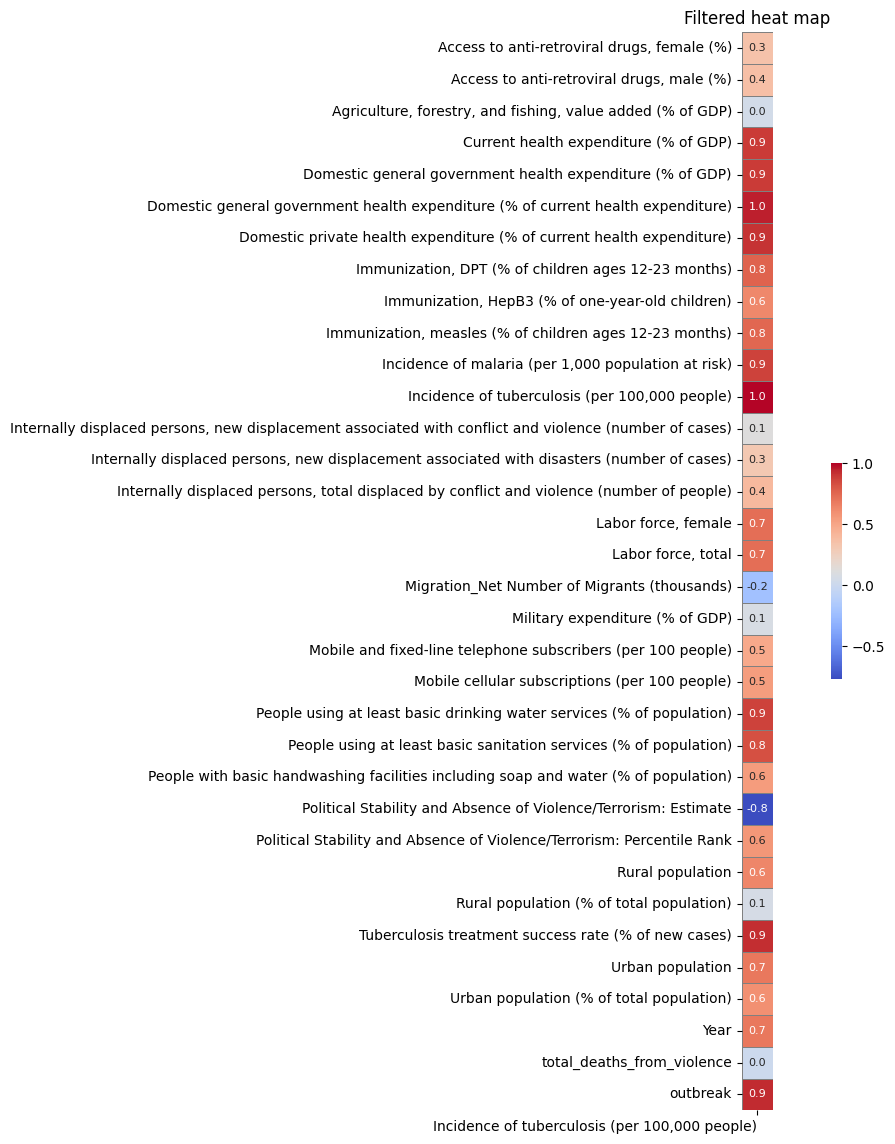

In [9]:
#Correlation with the incidence of tuberculosis
corr = df.corr()
#Filter y-axis
tuberculosis = ['Incidence of tuberculosis (per 100,000 people)']
y = corr.loc[:,tuberculosis]
#Graphic
plt.figure(figsize=(15, 14), dpi=100)
heatmap = sns.heatmap(y, annot=True, fmt=".1f", cmap="coolwarm",
                      annot_kws={"size": 8},
                      cbar_kws={"shrink": 0.2},
                      linewidths=0.5, linecolor='gray',
                      square=True)
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)
plt.title("Filtered heat map")
plt.show()

In [10]:
# Filter columns that have a correlation >= 0.7
corr = df.corr()
threshold = 0.7
filtered_columns = corr.columns[corr.loc['Incidence of tuberculosis (per 100,000 people)'] >= threshold]

# Create a new DataFrame with only the filtered columns
df_filtered = df[filtered_columns]
df_filtered.head(1)

,Current health expenditure (% of GDP),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic private health expenditure (% of current health expenditure),"Immunization, DPT (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Incidence of malaria (per 1,000 population at risk)","Incidence of tuberculosis (per 100,000 people)","Labor force, female","Labor force, total",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Tuberculosis treatment success rate (% of new cases),outbreak
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_filtered.columns

Index(['Current health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of current health expenditure)',
       'Domestic private health expenditure (% of current health expenditure)',
       'Immunization, DPT (% of children ages 12-23 months)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Incidence of malaria (per 1,000 population at risk)',
       'Incidence of tuberculosis (per 100,000 people)', 'Labor force, female',
       'Labor force, total',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'Tuberculosis treatment success rate (% of new cases)', 'outbreak'],
      dtype='object')

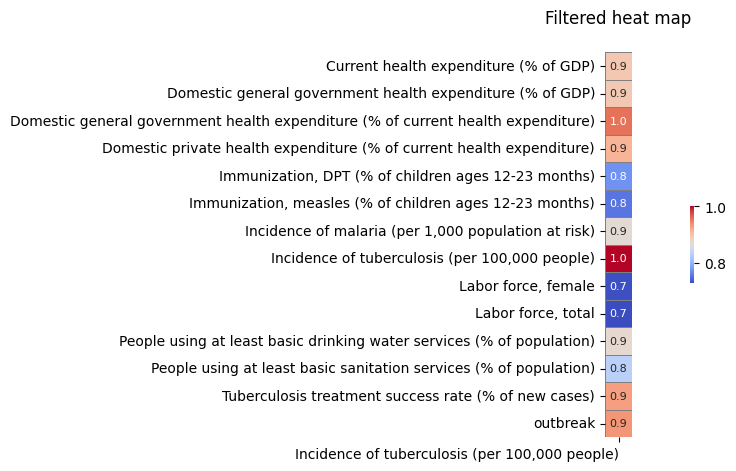

In [12]:
#Graphic
corr_2 = df_filtered.corr()
y_nuevo = corr_2.loc[:,tuberculosis]
plt.figure(figsize=(15, 5), dpi=100)
heatmap = sns.heatmap(y_nuevo, annot=True, fmt=".1f", cmap="coolwarm",
                      annot_kws={"size": 8},
                      cbar_kws={"shrink": 0.2},
                      linewidths=0.5, linecolor='gray',
                      square=True)
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)
plt.title("Filtered heat map\n")
plt.show()

# **3. REGRESSION MODEL**

In [78]:
X = df_filtered.drop(columns=['Incidence of tuberculosis (per 100,000 people)', 'outbreak', 'Tuberculosis treatment success rate (% of new cases)', 'Incidence of malaria (per 1,000 population at risk)'])
y = df_filtered['Incidence of tuberculosis (per 100,000 people)']
#Scalar X
scaler = StandardScaler()
X = scaler.fit_transform(X)
#Division de datos
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### **TRAIN MODEL**

In [18]:
#Search hyperparameters
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 500, 1500, step=100)
    learning_rate = trial.suggest_float('learning_rate', 0.03, 0.1, step=0.01)
    max_depth = trial.suggest_int('max_depth', 4, 8)
    subsample = trial.suggest_float('subsample', 0.5, 0.9, step=0.1)

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)

[I 2025-01-30 22:59:20,002] A new study created in memory with name: no-name-f313affa-9fdf-47d4-8cb9-6531d8b15552
[I 2025-01-30 22:59:24,845] Trial 0 finished with value: -121.9423202055084 and parameters: {'n_estimators': 1000, 'learning_rate': 0.04, 'max_depth': 5, 'subsample': 0.6}. Best is trial 0 with value: -121.9423202055084.
[I 2025-01-30 22:59:27,465] Trial 1 finished with value: -143.48716995085792 and parameters: {'n_estimators': 700, 'learning_rate': 0.06, 'max_depth': 4, 'subsample': 0.9}. Best is trial 0 with value: -121.9423202055084.
[I 2025-01-30 22:59:38,103] Trial 2 finished with value: -65.11169968920309 and parameters: {'n_estimators': 1000, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.5}. Best is trial 2 with value: -65.11169968920309.
[I 2025-01-30 22:59:42,907] Trial 3 finished with value: -155.79868277083386 and parameters: {'n_estimators': 600, 'learning_rate': 0.09, 'max_depth': 6, 'subsample': 0.6}. Best is trial 2 with value: -65.11169968920309.
[I 

Best hyperparameters: {'n_estimators': 600, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}


In [75]:
modelo = GradientBoostingRegressor(n_estimators=600, learning_rate=0.1, max_depth=5, subsample=0.5, random_state=42)
modelo.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=600, random_state=42,
                          subsample=0.5)

#### **EVALUATION METRICS**

In [79]:
y_predict = modelo.predict(X_test)
#Metrics
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('R2 =', round(r2*100), '%')
print('MAE =', mae)
print('MSE =', mse)
print('RMSE =', rmse)

R2 = 95 %
MAE = 4.574181464989863
MSE = 141.59494905071134
RMSE = 11.899367590368461


Test N°1:
  - modelo = GradientBoostingRegressor(n_estimators=600, learning_rate=0.07, max_depth=5, subsample=0.7, random_state=42)
  - Resultados:R2 = 93 %, MAE = 4.863130667883714, MSE = 204.6112087225594, RMSE = 14.304237439393944

Test N°2: + 'Incidence of malaria (per 1,000 population at risk)'
  - modelo = GradientBoostingRegressor(n_estimators=600, learning_rate=0.1, max_depth=5, subsample=0.5, random_state=42)
  - Resultados:R2 = 96 %, MAE = 4.223687596787903, MSE = 116.36824824010876, RMSE = 10.787411563489583

Test N°3: - 'Incidence of malaria (per 1,000 population at risk)'
  - modelo = GradientBoostingRegressor(n_estimators=600, learning_rate=0.1, max_depth=5, subsample=0.5, random_state=42)
  - Resultados = R2 = 95 %, MAE = 4.574181464989863, MSE = 141.59494905071134, RMSE = 11.899367590368461

# **4. CLASSIFICATION MODEL**

In [80]:
X_cl = df_filtered.drop(columns=['Incidence of tuberculosis (per 100,000 people)', 'outbreak','Tuberculosis treatment success rate (% of new cases)', 'Incidence of malaria (per 1,000 population at risk)'])
y_cl = df_filtered['outbreak']
#Scalar X
scaler = StandardScaler()
X = scaler.fit_transform(X)
#Division de datos
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl,y_cl, test_size=0.3, random_state=42)

In [30]:
# Función objetivo para Optuna
def objective(trial):
    # Definir los hiperparámetros a optimizar
    n_estimators = trial.suggest_int('n_estimators', 50, 200, step=50)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)
    max_features = trial.suggest_float('max_features', 0.5, 1.0)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    bootstrap_features = trial.suggest_categorical('bootstrap_features', [True, False])
    random_state = 42  # Controlamos la aleatoriedad para replicabilidad

    # Crear el modelo de Bagging
    model = BaggingClassifier(
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        bootstrap=bootstrap,
        bootstrap_features=bootstrap_features,
        random_state=random_state
    )

    # Usar validación cruzada para evaluar el rendimiento del modelo
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Devolver la métrica de evaluación (mayor es mejor)
    return score.mean()

# Crear el estudio de Optuna y optimizar
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)

[I 2025-01-30 23:49:00,092] A new study created in memory with name: no-name-c6eba97f-612f-4a48-bd62-447bb4f007d3
[I 2025-01-30 23:49:03,716] Trial 0 finished with value: 0.7072727272727273 and parameters: {'n_estimators': 150, 'max_samples': 0.7970136207876763, 'max_features': 0.7058065532352389, 'bootstrap': True, 'bootstrap_features': False}. Best is trial 0 with value: 0.7072727272727273.
[I 2025-01-30 23:49:07,035] Trial 1 finished with value: 0.7072727272727273 and parameters: {'n_estimators': 200, 'max_samples': 0.8078362035481745, 'max_features': 0.5332291030944782, 'bootstrap': True, 'bootstrap_features': False}. Best is trial 0 with value: 0.7072727272727273.
[I 2025-01-30 23:49:08,153] Trial 2 finished with value: 0.6872727272727274 and parameters: {'n_estimators': 100, 'max_samples': 0.6042212889207275, 'max_features': 0.9881129275911895, 'bootstrap': True, 'bootstrap_features': False}. Best is trial 0 with value: 0.7072727272727273.
[I 2025-01-30 23:49:09,274] Trial 3 fini

Mejores hiperparámetros: {'n_estimators': 150, 'max_samples': 0.7970136207876763, 'max_features': 0.7058065532352389, 'bootstrap': True, 'bootstrap_features': False}


In [81]:
modelo_begg = BaggingClassifier(
        n_estimators=150,
        max_samples=0.8,
        max_features=0.7,
        bootstrap=True,
        bootstrap_features=False,
        random_state=42
)

modelo_begg.fit(X_train_cl, y_train_cl)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=150,
                  random_state=42)

#### **METRICS**

EVALUATION METRICS MODEL:
----------------------------------

Classification Report
              precision    recall  f1-score   support

          no       0.94      1.00      0.97        16
         yes       1.00      0.86      0.92         7

    accuracy                           0.96        23
   macro avg       0.97      0.93      0.95        23
weighted avg       0.96      0.96      0.96        23



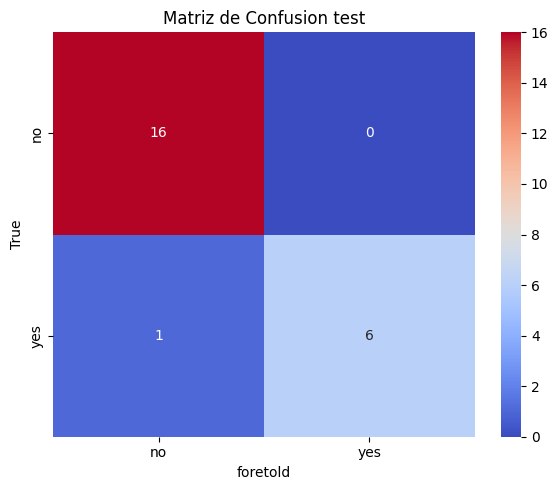

In [82]:
#Metrics
#0 = No, 1=yes
label = ['no', 'yes']
# Predicciones
y_pred_cl = modelo_begg.predict(X_test_cl)
reporte = classification_report(y_test_cl, y_pred_cl, target_names=label)
matrix = confusion_matrix(y_test_cl, y_pred_cl)
# Reporte de clasificacion
print("EVALUATION METRICS MODEL:")
print("----------------------------------\n")
print("Classification Report")
print(reporte)
# -------------------------------------------------------------------------------
# Matriz de confusion
plt.figure(figsize=(6, 5), dpi=100)
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt="d",xticklabels=label, yticklabels=label)
plt.title("Matriz de Confusion test")
plt.xlabel("foretold")
plt.ylabel("True")
#plt.savefig("Matriz_modelo_test.png")
plt.tight_layout()
plt.show()

#### **OVERFITTING**

In [83]:
# Predicciones en entrenamiento y test
y_train_pred = modelo_begg.predict(X_train_cl)
y_test_pred = modelo_begg.predict(X_test_cl)

# Cálculo de las métricas de evaluación
train_accuracy = accuracy_score(y_train_cl, y_train_pred)
test_accuracy = accuracy_score(y_test_cl, y_test_pred)

train_precision = precision_score(y_train_cl, y_train_pred, average='weighted', zero_division=0)
test_precision = precision_score(y_test_cl, y_test_pred, average='weighted', zero_division=0)

train_recall = recall_score(y_train_cl, y_train_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test_cl, y_test_pred, average='weighted', zero_division=0)

train_f1 = f1_score(y_train_cl, y_train_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test_cl, y_test_pred, average='weighted', zero_division=0)

#Print Metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", round(test_accuracy*100), '%')
print("\nTrain Precision:", train_precision)
print("Test Precision:", round(test_precision*100), '%')
print("\nTrain Recall:", train_recall)
print("Test Recall:", round(test_recall*100), '%')
print("\nTrain F1 Score:", train_f1)
print("Test F1 Score:", round(test_f1*100), '%')

Train Accuracy: 1.0
Test Accuracy: 96 %

Train Precision: 1.0
Test Precision: 96 %

Train Recall: 1.0
Test Recall: 96 %

Train F1 Score: 1.0
Test F1 Score: 96 %


  - The model does not appear to be overfitted.